<a href="https://colab.research.google.com/github/TAEWOOYOON/SkillTreePython-DataAnalysis/blob/main/ch02_05_%ED%9E%88%ED%8A%B8%EB%A7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.05. 히트맵

---
* 날짜: 2022.04.18
* 이름: 윤태우

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()
```

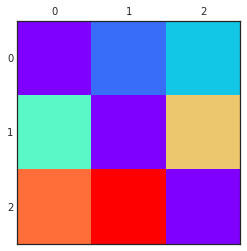

In [2]:
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()

#### | 컬러바

```
plt.colorbar(ax, 
             cmap=None, # 컬러맵
             alpha=None, # 투명도
             orientation='vertical', # 위치 {'vertical', 'horizontal'}
             extend=None,  # 초과값 {'neither', 'both', 'min', 'max'}
             shrink = None # 길이 축소
             aspect = None # 세로, 가로 비
             label=''# 라벨)
```

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.heatmap(x)
```

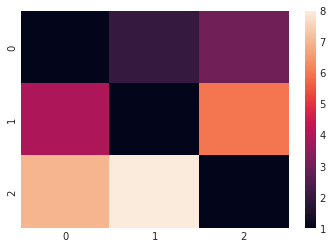

In [10]:
sns.heatmap(x)

#### | 옵션

```
seaborn.heatmap(data,
                cmap=None, # 컬러맵
                annot=None, # 값 표기
                fmt='.2g', # 데이터 타입
                linewidths=0, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=False, # 사이즈 정사각
                xticklabels='auto', # x 눈금 라벨 
                yticklabels='auto', # y 눈금 라벨
                vmin = # 최소값
                vmax = # 최대값
                ax=None, **kwargs)
```

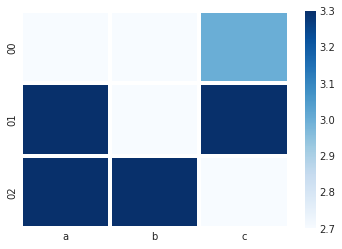

In [18]:
sns.heatmap(x,
                cmap='Blues', # 컬러맵
                fmt='d', # 데이터 타입
                linewidths=3, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=False, # 사이즈 정사각
                xticklabels=['a','b','c'], # x 눈금 라벨 
                yticklabels=['00','01', '02'], # y 눈금 라벨
                vmin = 3,   # 최소값
                vmax = 3)  # 최대값
plt.show()

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.


In [19]:
df = pd.DataFrame(x)
df

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1



* 데이터프레임에서 기본적으로 플롯을 제공합니다.

```
df.style.background_gradient()
```


In [20]:
df.style.background_gradient()

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1


* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.heatmap(data=df)
```


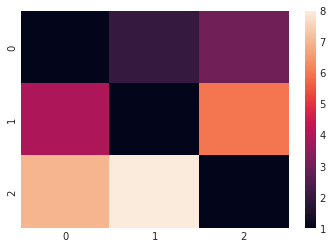

In [21]:
sns.heatmap(data=df, annot = True) # annot= True는 항상 쓴다고 생각 할것.


##  **실습** 
---



### (1) pivot 테이블 이용한 시계열 데이터 시각화


```
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

```

In [50]:
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

# df = pd.DataFrame([day,t,vals]).T      # 이렇게 하면 값은 잘 나오지만, info로 df의 타입을 보면 모든 값이 오브젝트임을 알 수 있음.
# df.info()                              # 아래 방법으로 하면 vals 값이 int.


df = pd.DataFrame([day, t]).T
df['count'] = vals
df.columns = ['day', 'time', 'count']

df.head()

,day,time,count
0,2020/01/01,오전,202
1,2020/01/01,오후,448
2,2020/01/01,저녁,370
3,2020/01/02,오전,206
4,2020/01/02,오후,171


In [51]:
# 행 / 열 / 값
df.pivot('day', 'time', 'count').style.background_gradient()

time,오전,오후,저녁
day,,,
2020/01/01,202,448,370
2020/01/02,206,171,288
2020/01/03,120,202,221
2020/01/04,314,430,187
2020/01/05,472,199,459


### (2) Iris 데이터 변수별 상관관계 분석


```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [42]:
from sklearn.datasets import load_iris
iris = load_iris()

### (3) Iris 데이터 종류별 크기 분석



In [77]:
x_names = iris.feature_names
y_names = iris.target_names
x_data = iris.data
y_data = iris.target

data1 = pd.DataFrame(x_data)
data1.columns = x_names
data1['label'] = y_data
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
data1.corr().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


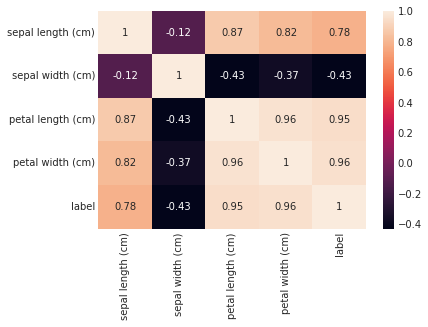

In [84]:
sns.heatmap(data1.corr(), annot = True)   # annot = True -> 각 칸에 해당하는 값을 넣음.

# 상관관계별 구분법 숙지
# heatmap 같은 것을 더 잘 나타내는 컬러맵을 보고 싶으면 matplotlib 페이지에 들어가서 찾아볼것.

In [ ]:
# 


##  **과제** 
---



### (1) 히트맵을 이용한 flight 데이터 시각화


```
df=sns.load_dataset('flights')
```

* `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러오세요.
* `year`를 세로축, `month`를 가로축으로 하는 피벗 테이블을 그리고 히트맵으로 시각화 하세요.



In [81]:
df=sns.load_dataset('flights')
plt.pivotdf['year']

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121



### (2) 캘리포니아 집값 데이터 변수별 상관관계 분석

* /content/sample_data/california_housing_test.csv을 불러오세요.
* 변수별 상관관계를 나타내는 히트맵을 `seaborn`을 이용해  그리세요.
* 변수들 중 상관관계가 높은 변수 쌍을 각각 x축, y축으로 하는 산점도를 그리세요. (2개이상)
* 변수들 중 `median_house_value`와 가장 상관관계가 높은 변수를 찾고 둘을 각각 x축, y축으로 하는 산점도를 그리세요.